# Chapter 2: Exercise 9

**Import packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

**Load Auto data set**

In [2]:
os.chdir('C:/Users/carma/Documents/Python Projects/islp')
Auto = pd.read_csv('Auto.csv', na_values=['?'])

**Remove rows with missing values**

In [3]:
Auto = Auto.dropna().reset_index().drop(columns='index')

**View first five observations.**

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Part (a)
- **Quantitative predictors:** mpg, cylinders, displacement, horsepower, weight, acceleration.
- **Qualitative predictors:** year, origin, name.

## Parts (b) and (c)
**Range, mean, and standard deviation of each quantitative predictor.**

In [5]:
quantitative = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration']

In [6]:
ranges = [np.max(Auto[column]) - np.min(Auto[column]) for column in quantitative]
means = [np.mean(Auto[column]) for column in quantitative]
stds = [np.std(Auto[column]) for column in quantitative]
maxes = [np.max(Auto[column]) for column in quantitative]
mins = [np.min(Auto[column]) for column in quantitative]

In [7]:
d = {'Max': maxes, 'Min': mins, 'Range': ranges, 'Mean': means, 'Standard Deviation': stds}
measuresdf = pd.DataFrame(d, index=quantitative)

In [8]:
measuresdf

,Max,Min,Range,Mean,Standard Deviation
mpg,46.6,9.0,37.6,23.445918,7.795046
cylinders,8.0,3.0,5.0,5.471939,1.703606
displacement,455.0,68.0,387.0,194.411990,104.510444
horsepower,230.0,46.0,184.0,104.469388,38.442033
weight,5140.0,1613.0,3527.0,2977.584184,848.318447
acceleration,24.8,8.0,16.8,15.541327,2.755343


## Part (d)
**Removing 10th through 85th observations from Auto and recomputing above measures.**

In [9]:
AutoNew = Auto.drop(index=[i for i in range(10,86)]).reset_index().drop(columns='index')

In [10]:
ranges = [np.max(AutoNew[column]) - np.min(AutoNew[column]) for column in quantitative]
means = [np.mean(AutoNew[column]) for column in quantitative]
stds = [np.std(AutoNew[column]) for column in quantitative]
maxes = [np.max(Auto[column]) for column in quantitative]
mins = [np.min(Auto[column]) for column in quantitative]

In [11]:
d = {'Max': maxes, 'Min': mins, 'Range': ranges, 'Mean': means, 'Standard Deviation': stds}
measuresdf = pd.DataFrame(d, index=quantitative)

In [12]:
measuresdf

,Max,Min,Range,Mean,Standard Deviation
mpg,46.6,9.0,35.6,24.407595,7.850833
cylinders,8.0,3.0,5.0,5.373418,1.651559
displacement,455.0,68.0,387.0,187.512658,99.956081
horsepower,230.0,46.0,184.0,100.848101,35.897212
weight,5140.0,1613.0,3348.0,2936.534810,810.588821
acceleration,24.8,8.0,16.3,15.717405,2.709579


## Part (e)
**Investigating the predictors graphically and making observations.**

In [13]:
sns.set_theme(style='ticks')

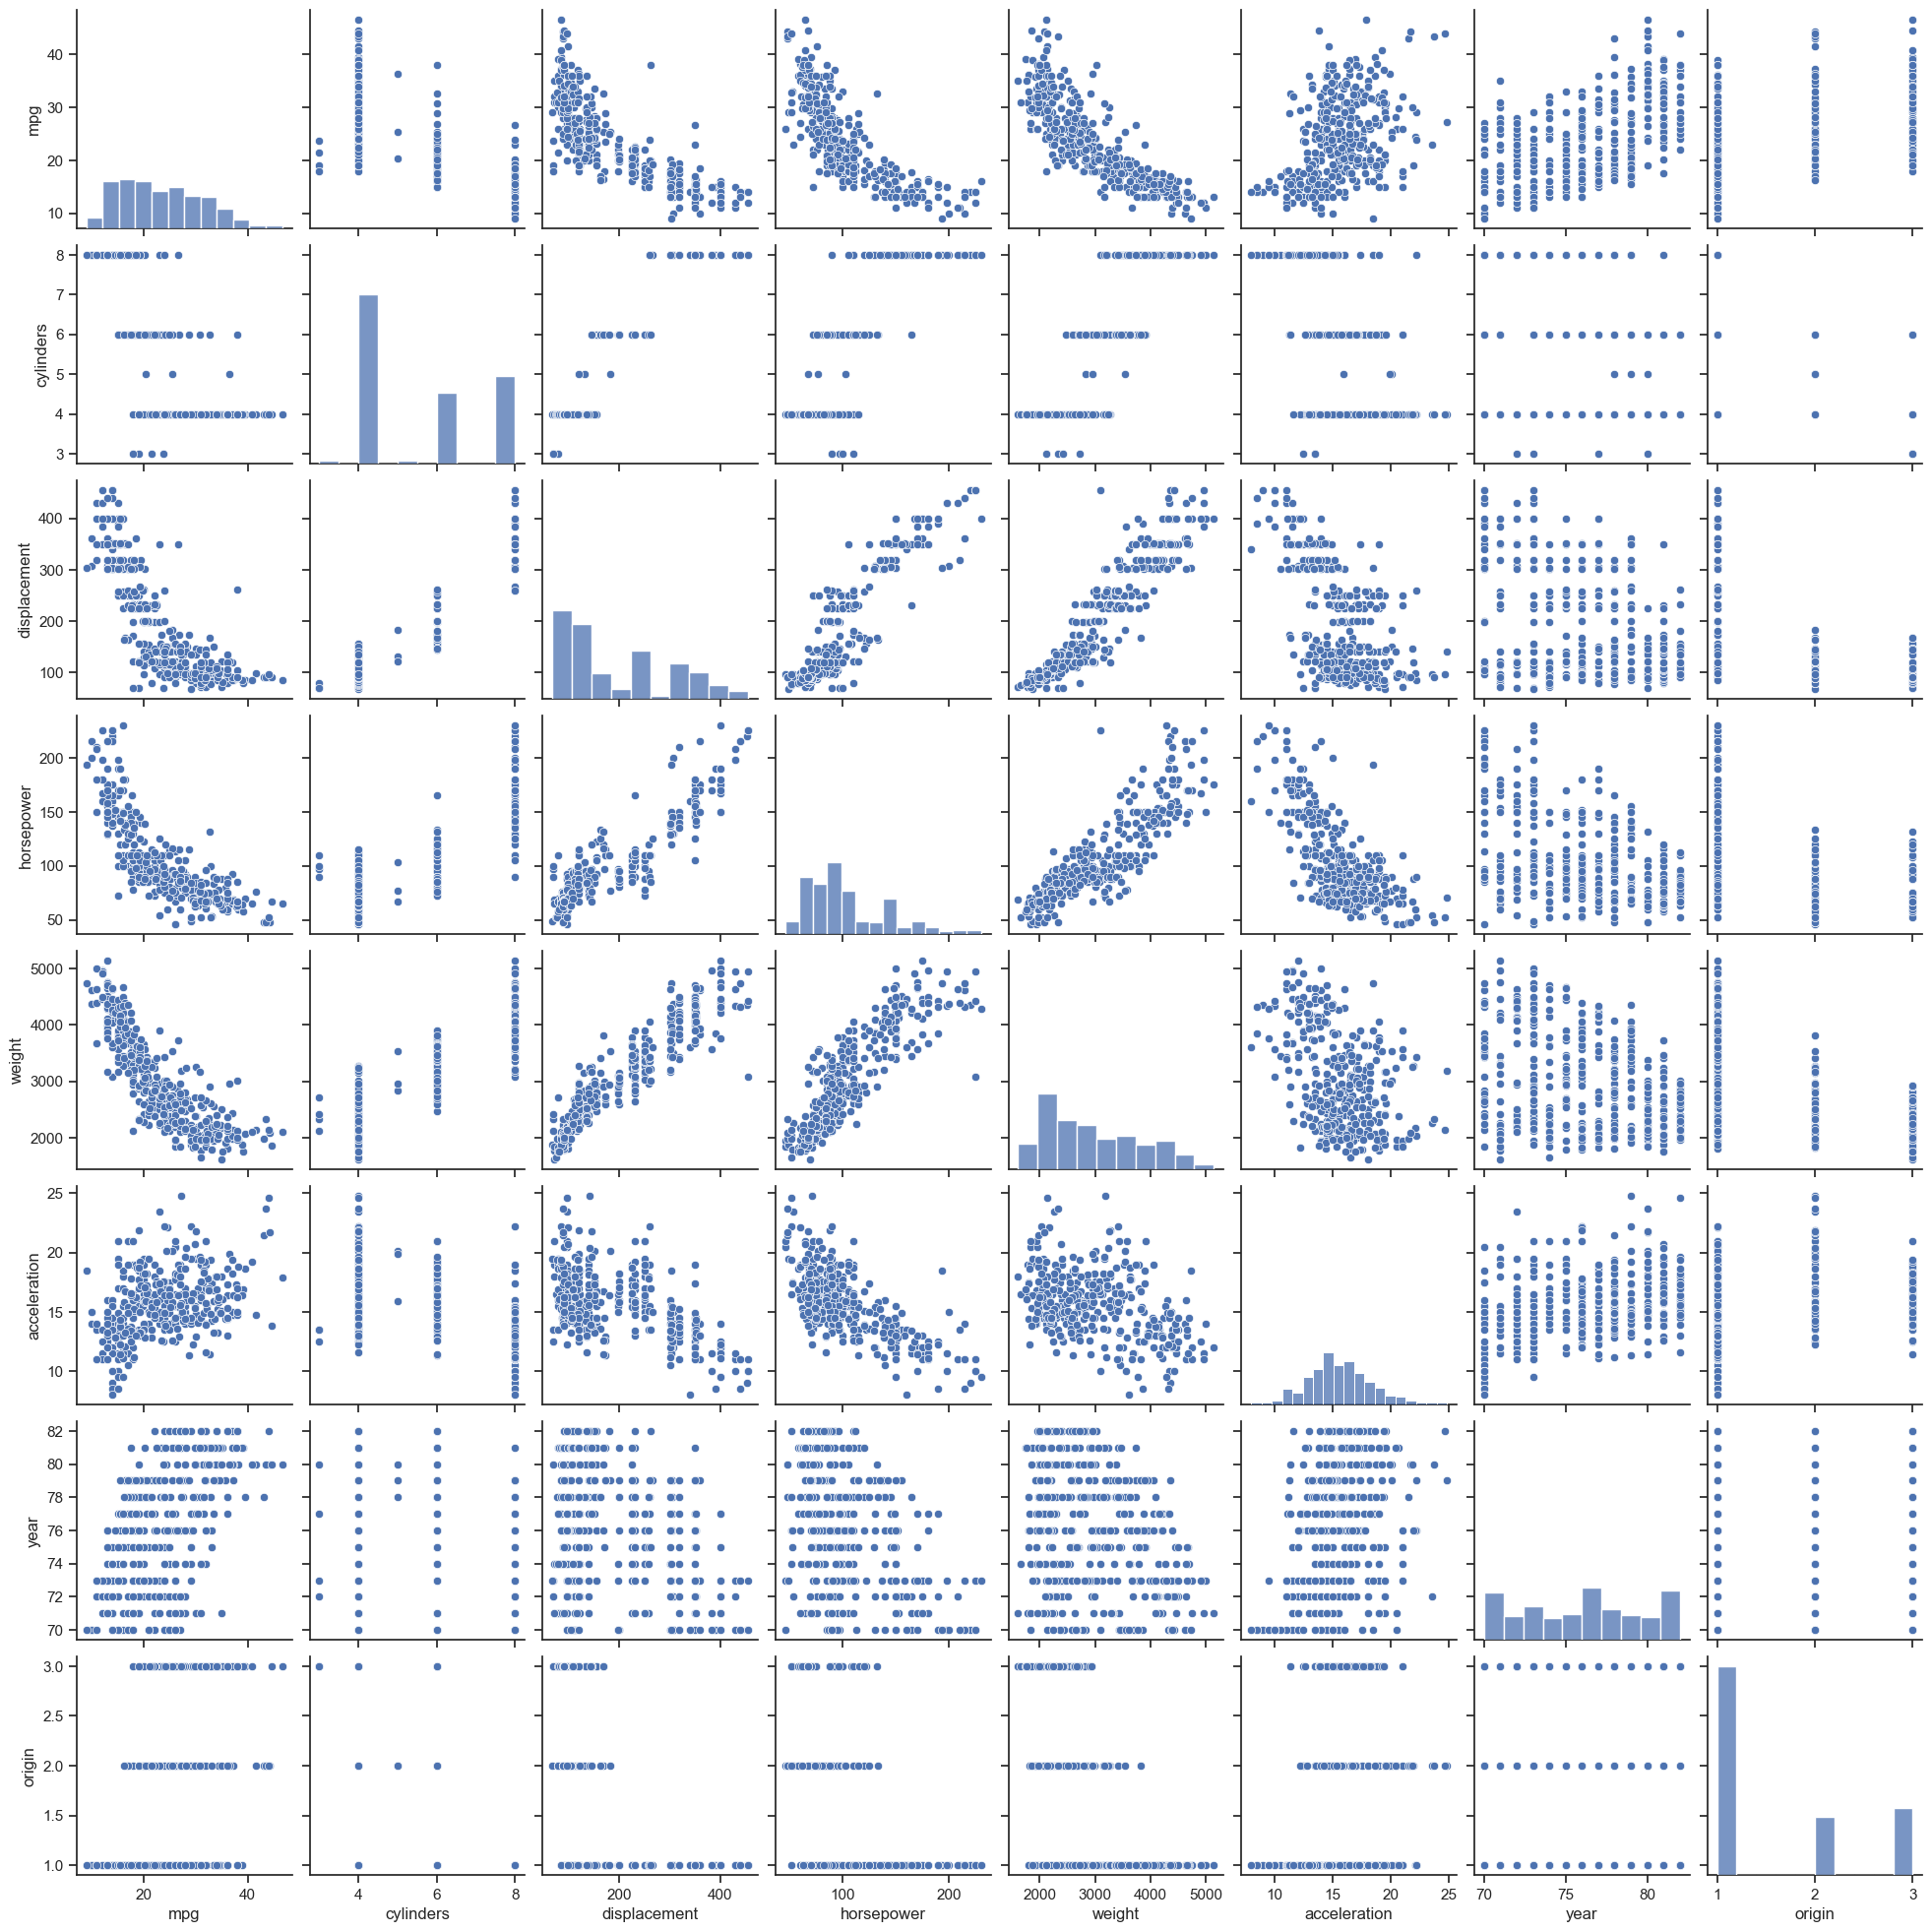

In [14]:
sns.pairplot(Auto)

**Observations:**
- As number of cylinders increase weight increases.
- As number of cylinders increase acceleration decreases.
- As number of cylinders increase horsepower increases.
- As number of cylinders increase displacement increases.
- As number of cylinders increase mpg decreases.
- As displacement increases horsepower increases.
- As displacement increases mpg decreases.
- As horsepower increases acceleration decreases.
- As horsepower increases mpg decreases.
- As weight increases mpg decreases.
- As year increases mpg increases.


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

In [16]:
p = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(ax=axes[i, j], data=Auto, x='origin', y=quantitative[p], palette=['red', 'green', 'blue'])
        p += 1

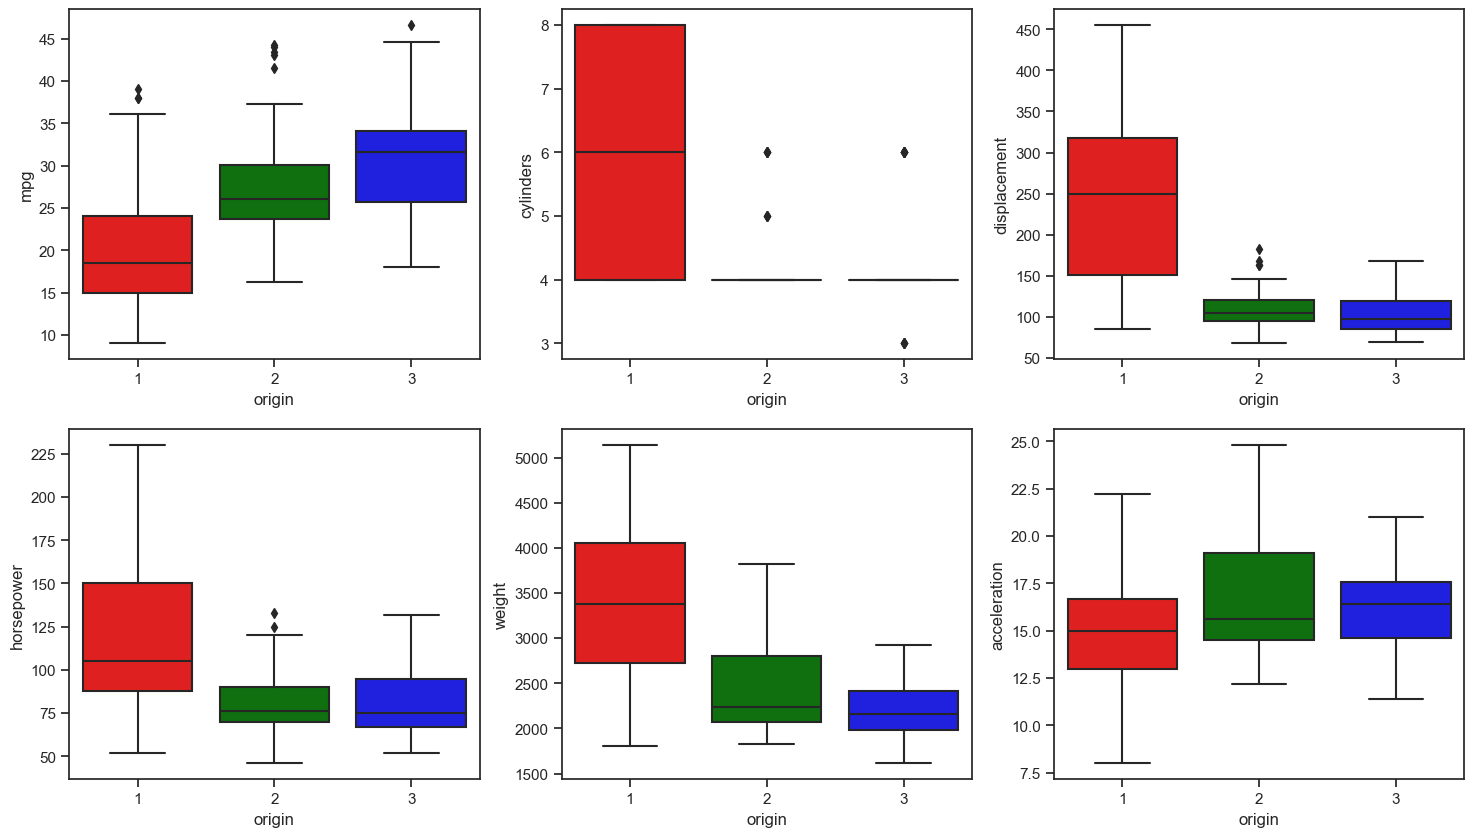

In [17]:
fig

**Observations**
- Origin 1 (America) makes cars with lower mpg, higher horsepower, higher weight.
- Origin 3 (Japan) makes cars with higher mpg, lower horsepower, lower weight, and moderate acceleration.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
quantitativeShortened = ['mpg', 'horsepower', 'weight',
                'acceleration']

In [19]:
p = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(ax=axes[i, j], data=Auto, x='cylinders', y=quantitativeShortened[p])
        p += 1

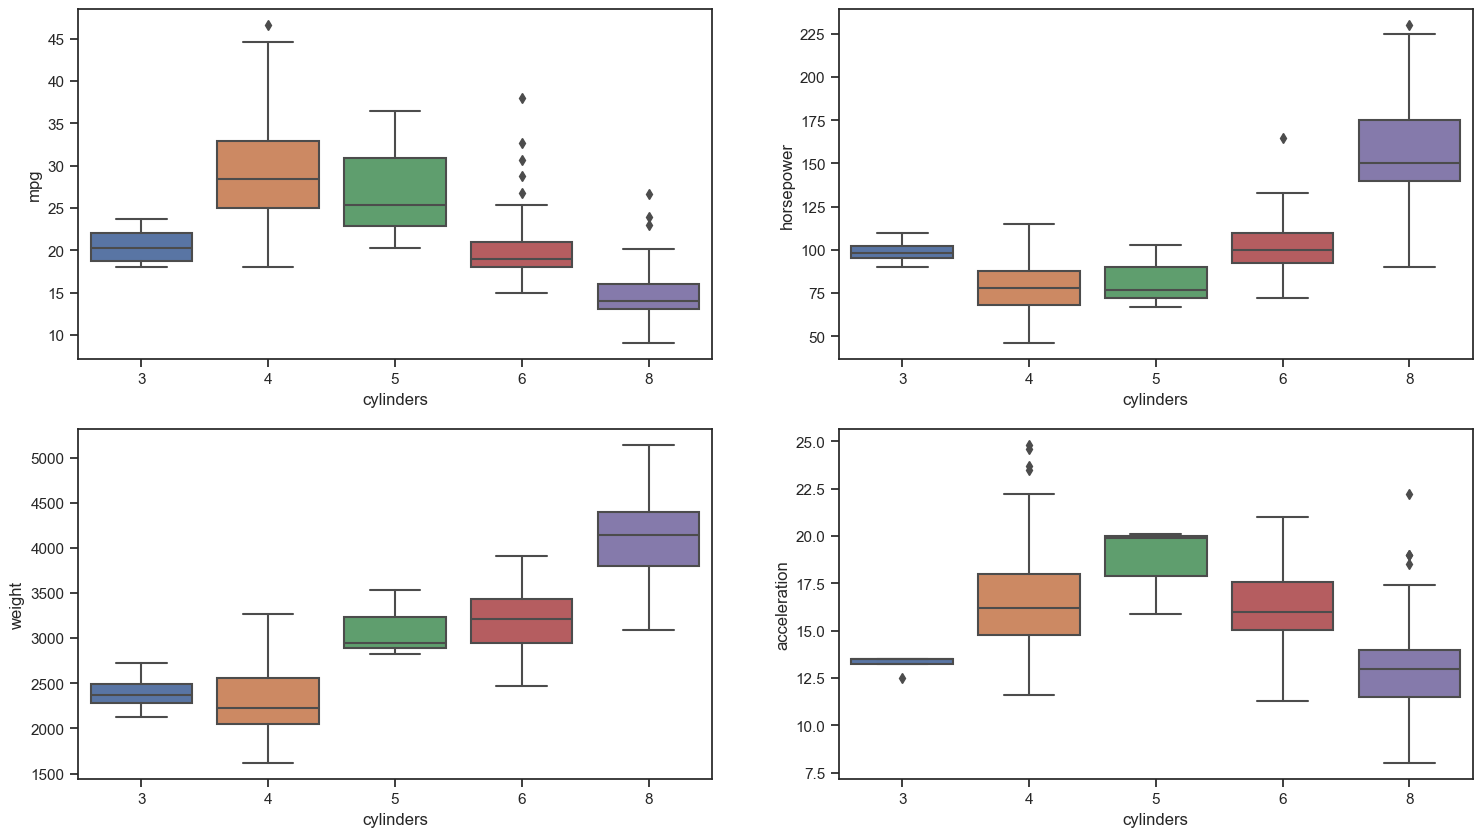

In [20]:
fig

**Observations**
- Cars with 4 cylinders get higher mpg, lower horsepower, lower weight, and moderate acceleration.
- For cylinders greater than 4 we see a decrease in mpg, an increase in horsepower, and an increase in weight.
- Cars with 5 cylinders get best acceleration, moderate weight, low horsepower, and good mpg.

## Part (f)
**Useful variables for predicting gas mileage (mpg).**
- As number of **cylinders** increase mpg decreases.
- As **displacement** increases mpg decreases.
- As **horsepower** increases mpg decreases.
- As **weight** increases mpg decreases.
- As **year** increases mpg increases.
- **Origin** 1, 2, 3 (American, European, Japanese) mpg increases lowest to highest.